<a href="https://colab.research.google.com/github/akshaybiliki/Google-Data-Analytics-Capstone-Projects/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [57]:
# Data cleaning and Analysis package
import pandas as pd

# array-processing package
import numpy as np

# Data Visualization package
import matplotlib.pyplot as plt

# statistical graphical visualization package
import seaborn as sns

import datetime as dt



In [58]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df = pd.read_csv('/content/drive/MyDrive/Alma better/EDA Capstone project python/Hotel Bookings.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [60]:
df.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### **1**.**Data** **Cleaning**

In [62]:
df1 = df.copy()

In [61]:
# Chaecking is threre any null values in all columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [63]:
# agent and company columns  are having mor NaN values in their rows so instead of removing rows better to drop both columns
df.drop(columns = ['agent','company'],axis=1, inplace = True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [64]:
# Dropping 'NUll' values from the column - 'country'. Here we can remove row wise because 488 roes are neglizible out of 119390 rows
df.dropna(axis = 0,inplace = True)

In [55]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [56]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01


#  **2**.**Analysis**




## *2.1 Which type of hotel is more preferable by customers (overall) ?:*




([<matplotlib.patches.Wedge at 0x7feac32ffc50>,
 [Text(-0.5490767292350826, -0.9531603985754465, 'City Hotel'),
  Text(0.5989926981750144, 1.0398113999822354, 'Resort Hotel')],
 [Text(-0.29949639776459047, -0.5199056719502435, '66.7%'),
  Text(0.3494124072687584, 0.6065566499896373, '33.3%')])

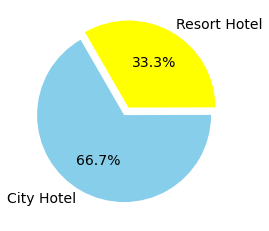

In [118]:


# converting type of hotel (index) to list  - ['resort_hotel','city_hotel']
labels = df['hotel'].value_counts()
x = labels.index.tolist()

# converting values to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.1)

# colors in list
colors = ['skyblue','yellow']

# autopct enable the percent values ,and 1f%% will make round the 10th value
# startangle will allow the percentage to rotate counter-clockwise, Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smaller value (10%)
# textprops will adjust the size of text

plt.pie(sizes, labels = x,explode = explode, colors=colors, autopct='%1.1f%%', startangle = 120, textprops= {'fontsize':14} )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

##*2.2 In which year did guests visit most of both types of hotels?*

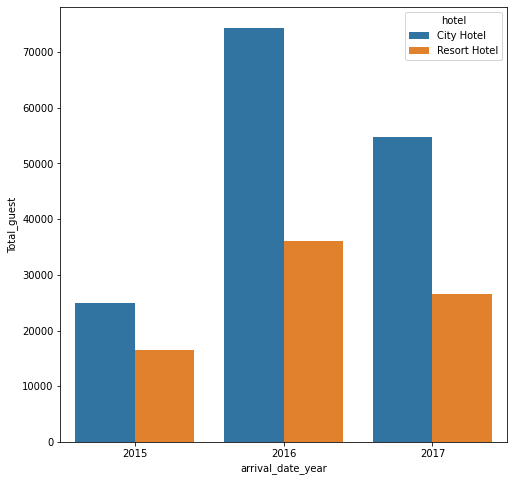

In [75]:
table23 = pd.pivot_table(df, index =['arrival_date_year', 'hotel'],aggfunc = {'Total_guest' : np.sum}).reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x = 'arrival_date_year', y = 'Total_guest',hue ='hotel',data =table23)




### In the year 2016, both types of hotels have been visited by a large number of guests






##*2.3 In which month did guests visit most of both types of hotels?*

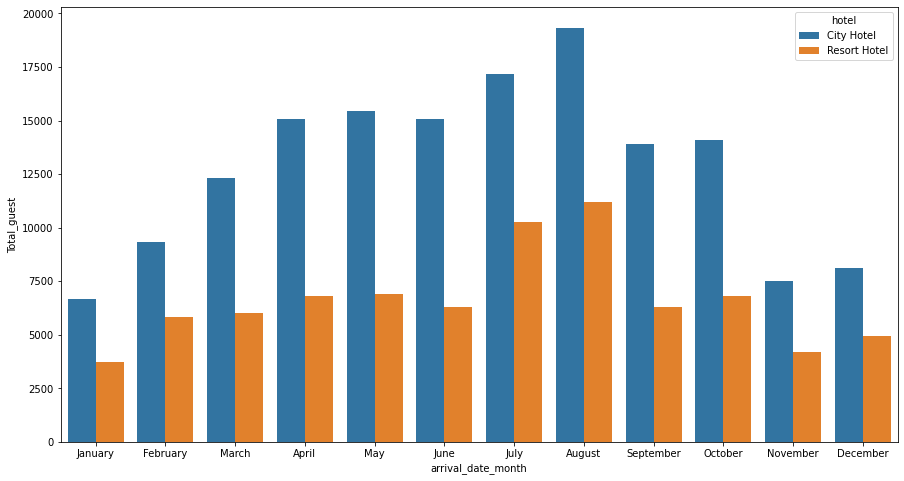

In [83]:
table24 = pd.pivot_table(df, index =['arrival_date_month', 'hotel'],aggfunc = {'Total_guest' : np.sum}).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = 'arrival_date_month', y = 'Total_guest',hue ='hotel',data =table24,order =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])                                                                                                                                      
                                                                                 
                                      


*   The guest numbers are less in the January,and November month so this is best time to book both city,and resort hotel.

*   The 'August' is more busiest month followed by  'july' as well








In [68]:
# combining date, year, moth column to new column
df['d_m_d'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))

In [69]:
# Extracting the day name from date format
df['weekday_name'] = df.d_m_d.dt.day_name()

In [71]:
df['Total_guest'] = df['adults'] + df['children']
df['total_no_days_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

Noofguests = df[['arrival_date_year', 'Total_guest','weekday_name']]

In [10]:
Noofguests

,arrival_date_year,Total_guest,weekday_name
0,2015-07-01,2.0,Wednesday
1,2015-07-01,2.0,Wednesday
2,2015-07-01,1.0,Wednesday
3,2015-07-01,1.0,Wednesday
4,2015-07-01,2.0,Wednesday
...,...,...,...
119385,2017-08-30,2.0,Wednesday
119386,2017-08-31,3.0,Thursday
119387,2017-08-31,2.0,Thursday
119388,2017-08-31,2.0,Thursday


##*2.4 In which weekday did guests visit most of both types of hotels?*

In [14]:
table = pd.pivot_table(df, index =['weekday_name', 'hotel'],aggfunc = {'Total_guest' : np.sum}).reset_index()
table

,weekday_name,hotel,Total_guest
0,Friday,City Hotel,27705.0
1,Friday,Resort Hotel,11657.0
2,Monday,City Hotel,22488.0
3,Monday,Resort Hotel,12302.0
4,Saturday,City Hotel,22365.0
5,Saturday,Resort Hotel,14877.0
6,Sunday,City Hotel,18060.0
7,Sunday,Resort Hotel,10228.0
8,Thursday,City Hotel,25422.0
9,Thursday,Resort Hotel,12207.0


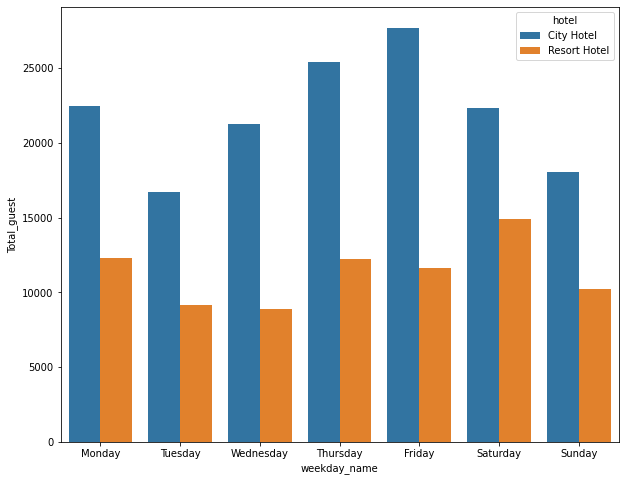

In [18]:
plt.figure(figsize = (10,8))
sns.barplot( x = 'weekday_name', y = 'Total_guest', hue = 'hotel',data = table,order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] )
#table.plot(kind='bar');

The guest numbers are less in the 'sunday,and 'Tuesday' weekdays so this is best time to book both city,and resort hotel.

In [24]:
table1 = pd.pivot_table(df, index =['arrival_date_month', 'hotel'],aggfunc = {'Total_guest' : np.sum}).reset_index()
table1

,arrival_date_month,hotel,Total_guest
0,April,City Hotel,15077.0
1,April,Resort Hotel,6818.0
2,August,City Hotel,19331.0
3,August,Resort Hotel,11189.0
4,December,City Hotel,8107.0
5,December,Resort Hotel,4944.0
6,February,City Hotel,9345.0
7,February,Resort Hotel,5820.0
8,January,City Hotel,6691.0
9,January,Resort Hotel,3715.0


The guest numbers are less in the January,and November month so this is best time to book both city,and resort hotel.

##*2.5 From which Market_segment did guests visit most of both types of hotels?*

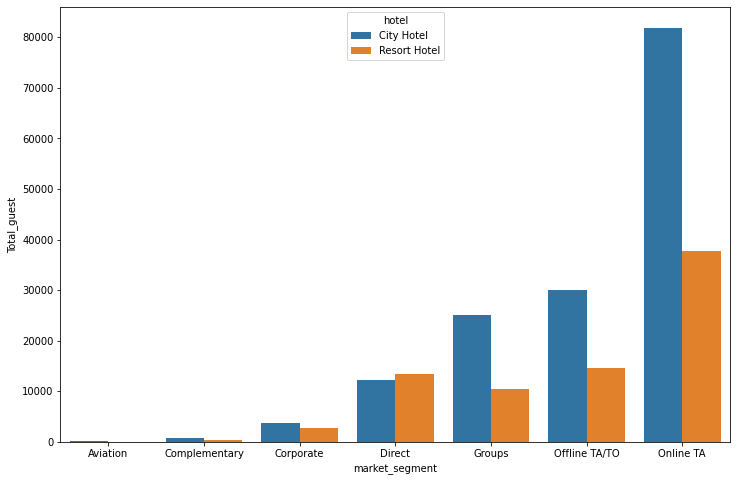

In [39]:
table3 = pd.pivot_table(df, index =['market_segment', 'hotel'],aggfunc = {'Total_guest' : np.sum}).reset_index()

plt.figure(figsize = (12,8))
sns.barplot( x = 'market_segment', y = 'Total_guest', hue = 'hotel',data = table3)




*  Most of the customers are from online Travel Agency
*  If we consider Direct market_segment area here the customers are going prefer Resort Hotel than City Hotel














##*2.6 Which type of customer visits the most throughout the year?*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

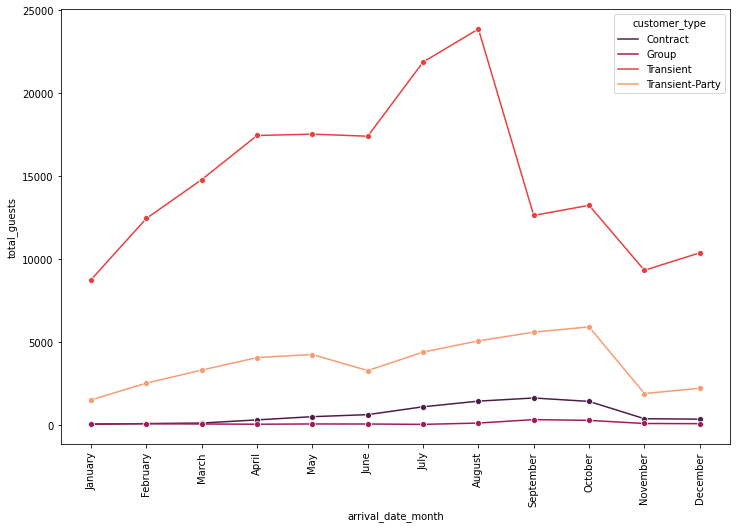

In [57]:
df["arrival_date_month"]= pd.Categorical(df["arrival_date_month"],['January', 'February','March','April','May','June','July','August','September','October','November','December'])
tp1 = pd.crosstab(index= df['arrival_date_month'],
                  columns= df["customer_type"], 
                  values= df['Total_guest'], 
                  aggfunc ="sum")

stacked = tp1.stack().reset_index().rename(columns={0:'total_guests'})
plt.figure(figsize = (12,8))
p = sns.lineplot(x=stacked.arrival_date_month, y=stacked.total_guests, hue=stacked.customer_type, palette="rocket",  marker = "o")
plt.xticks(rotation=90)




*   The Group type guests are very low during the whole year
*   There is a peak season for Transient-Party guests in october
*   There is a very clear peak season for Transient guests between July and Agust
*   Contract guests numbers are very low during the first half of the year
*   There is a very clear that the peak season for Transient guests between July and August






##*2.7 Both types of hotels are visited more by guests from which country? Mention the top 10*

Text(0.5, 1.0, 'Top 10 countries by number of guests')

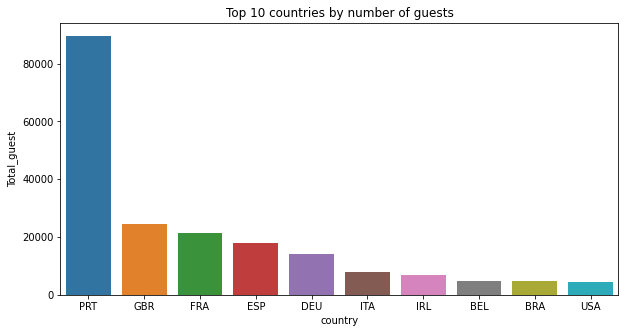

In [79]:
table5 = pd.pivot_table(df, index =['country'],aggfunc = {'Total_guest' : np.sum}).reset_index()
table6 = table5.sort_values('Total_guest', ascending = False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(x = 'country', y = 'Total_guest', data = table6)
plt.title("Top 10 countries by number of guests")



*   most tourists come from Portugal followed by the UK and France 
*   most tourists come from Europe since the top 5 countries are in Europe




##*2.8 Which hotel has the customer made the most special request?*

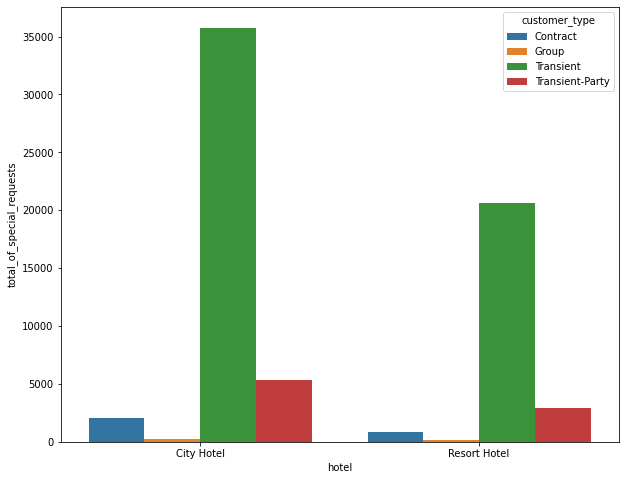

In [85]:
table7 = pd.pivot_table(df, index =['customer_type','hotel'],aggfunc = {'total_of_special_requests': np.sum}).reset_index()

plt.figure(figsize = (10,8))
sns.barplot( x = 'hotel', y = 'total_of_special_requests', hue = 'customer_type',data = table7)



*   Tarnsient type of customer has  more special request for both type of hotels especially city hotel




In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  datetime64[ns]
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

##*2.9 Monthy ADR report for the analysis of price and revnue?*

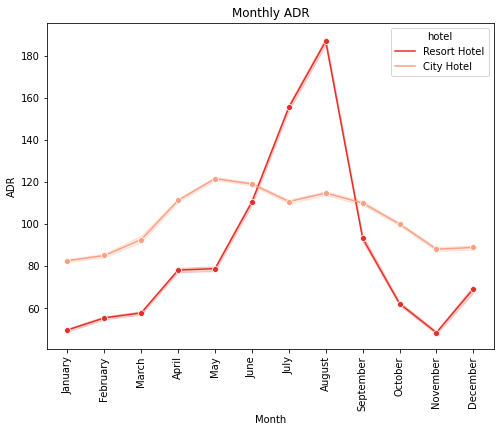

In [39]:
# Monthly ADR
df["arrival_date_month"]= pd.Categorical(df["arrival_date_month"],['January', 'February','March','April','May','June','July','August','September','October','November','December'])
plt.figure(figsize = (12,6))
fig = sns.lineplot(x ='arrival_date_month', 
             y = 'adr', 
             hue = 'hotel', 
             data = df,
                  palette="Reds_r",
                   marker = "o")

plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('ADR')
plt.title('Monthly ADR') 
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()




*   prices for the rooms as well avg revenue for hotel  increases a lot during the peak season between July and August.

*   The best time to book the hotels for lowest price in during the time of January and November.



In [87]:
# Number of guests according to the number of nights booked
table8 = pd.pivot_table(df,index = ['hotel'],aggfunc = {'Total_guest': np.sum, 'stays_in_week_nights': np.sum}).reset_index()
table8
#plt.figure(figsize = (5,8))
#sns.barplot( x = '', y = 'total_of_special_requests', data = table7)


,hotel,Total_guest,stays_in_week_nights
0,City Hotel,154046.0,173108
1,Resort Hotel,79303.0,124392


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

In [90]:
# For further analysis, We will select only those bookings which did not get canceled
df_not_canceled = df[df['is_canceled'] == 0]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_guest,total_no_days_stay,d_m_d,weekday_name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0,2015-07-01,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,2.0,0,2015-07-01,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1,2015-07-01,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1,2015-07-01,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2,2015-07-01,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7,2017-08-30,Wednesday
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7,2017-08-31,Thursday
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7,2017-08-31,Thursday
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7,2017-08-31,Thursday


##*3.0 Hotel wise as well how long customer will prefer to stay in both type hotels?*

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


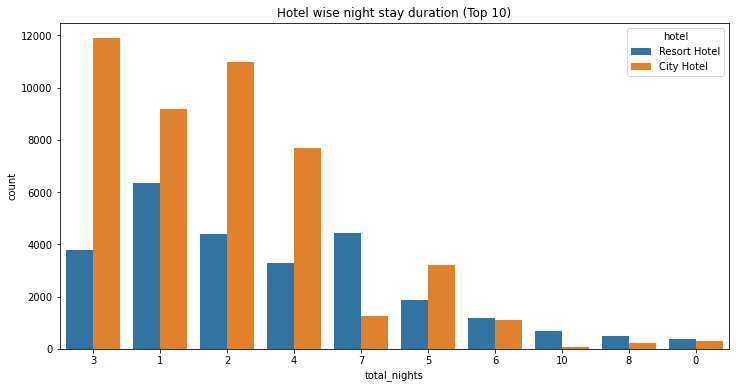

In [93]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

Most of the customers prefer single dat stay in 'Resort hotel', and 3 days stay in 'city hotel'

## Conclusion :

As 2.1 overall 66.7% customers prefer city hotel, and 33.3% people prefer resort hotel.

As 2.2 In the year 2016, both types of hotels have been visited by a large number of guests.

As 2.3 The 'August' is busiest month followed by 'july' as well
January and November are the months when the number of guests is less and the prices (As 2.9) are also lower during that time so it is a good time to book both city and resort hotels.

As 2.4 Friday is the most busiest weekday throughout the year so better to book ‘Tuesday’ and ‘Sunday’ as those days have the least number of guests compared to the rest.

As 2.5 Most of the customers are from online travel agencies staying at both types of hotels. If we consider direct market_segment area here customers prefer resort hotel over city hotel, but airline segment has least number of guests.So here attractive discount price should be given to other segments as well

As 2.6 Both hotel having large number of ‘Transient’ type of customer and least numbers of contract customer,and July to September are the peak time so all type customers visits more

As 2.7 Most of the customer from portugal,and followed by european countries

As 2.8 Tarnsient type of customer has more special request for both type of hotels especially city hotel

As 2.9 During the time july to August 'resort hotel' has higer price than city hotel so customer prefer more city hotel. Here better to make reasonable price to attract the customers and increse the revenue further

As 3.0 customes are prefer to stay single day in resort hotel,and 2 -3 days in city hotel


